<a href="https://colab.research.google.com/github/garynguyen158/Project-2/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [0]:
import requests
import os
import re
import numpy as np
import statistics
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import time
import pandas as pd
import scipy.stats as ss
import matplotlib as mpl
!pip install netcdf4 
!pip install dask
!pip install xarray
!pip install thredds_crawler
from thredds_crawler.crawl import Crawl
from sklearn import preprocessing
from datetime import timedelta
from datetime import datetime



---

## Oregon Shelf Surface Mooring


In [0]:
wind_1 = []
wind_2 = []
wind_3 = []
wind_4 = []
wind_5 = []
wind_6 = []
wind_7 = []
wind_8 = []
wind_9 = []
wind_10 = []
wind_11 = []
wind_12 = []
rain_1 = []
rain_2 = []
rain_3 = []
rain_4 = []
rain_5 = []
rain_6 = []
rain_7 = []
rain_8 = []
rain_9 = []
rain_10 = []
rain_11 = []
rain_12 = []
Months = [1,2,3,4,5,6,7,8,9,10,11,12]

### Rain and Wind

In [0]:
API_USERNAME = 'OOIAPI-LRAQISAJJCRQUR'
API_TOKEN = 'TEMP-TOKEN-XQS0M8G9IOU6FK'

# Instrument Information
site = 'CE02SHSM'
node = 'SBD11'
instrument = '06-METBKA000'
method = 'telemetered'
stream = 'metbk_hourly'

params = {
  'beginDT':'2019-01-01T00:00:00.000Z',
  'endDT':'2020-01-01T00:00:00.000Z',
  'format':'application/csv',
  'parameter' : '3076,3092,3074',
}

api_base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

# Create the request URL
data_request_url ='/'.join((api_base_url,site,node,instrument,method,stream))

r = requests.get(data_request_url, params=params, auth=(API_USERNAME, API_TOKEN))
data1 = r.json()

check_complete = data1['allURLs'][1] + '/status.txt'
print('Initiating request')
for i in range(1000): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('Request complete. Reading data...')
        break
    else:
        time.sleep(.5)

url = data1['allURLs'][0]

c = Crawl(url, select=[".*\.csv$"], debug=False)
urls = [s.get("url") for d in c.datasets for s in d.services if s.get("service").lower() == "httpserver"]

#Requesting an entire year of data will result in multiple CSV files; 
#The following code compiles them into one DataFrame, starting in January and ending in December.
data=pd.DataFrame()  
for x in range(1,len(urls)+1):
  url2=urls[len(urls)-x]
  #print(url)
  newData=pd.read_csv(url2)
  newData=newData.reset_index(drop=True)
  data=pd.concat(objs=[data,newData])


Initiating request
Request complete. Reading data...


In [0]:
data = data.sort_values(by='time',ascending=True).reset_index(drop=True)

In [0]:
rain_raw = data.loc[:, 'met_rainrte']
wind_raw = data.loc[:, 'metbk_a_dcl_instrument-met_relwind_speed']
#wind_nom = preprocessing.scale(wind_raw)
#rain_nom = preprocessing.scale(rain_raw)
time_raw = data.loc[:, 'time']
timeraw_Shelf = time_raw

In [0]:
b = datetime(1900, 1, 1)
c = datetime(1970, 1, 1)
e = timedelta(hours=8)
tdelta = c-b-e
t = pd.to_datetime(time_raw, unit= 's')
timeShelf = t - tdelta


Orange is Wind Speed
Blue is Rain Rate
Red is No Rain No Wind
Black is Rain Without Wind
Green is Wind Without Rain
Yellow is Both Rain and Wind


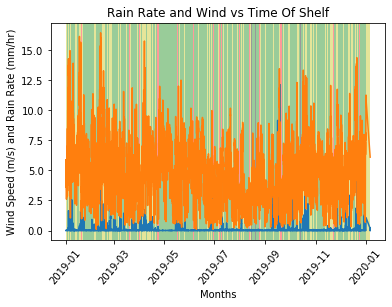

In [0]:

for i in range(len(time_raw)-1):
        if rain_raw[i]/np.mean(rain_raw) < .25 and wind_raw[i]/np.mean(wind_raw) < .25:
            #Case 1: No rain or wind
            plt.axvspan(timeShelf[i], timeShelf[i+1], facecolor='r', alpha=.4)
        elif rain_raw[i]/np.mean(rain_raw) >= .25 and wind_raw[i]/np.mean(wind_raw) < .25:
            #Case 2:Rain and no wind
            plt.axvspan(timeShelf[i], timeShelf[i+1], facecolor='k', alpha=.4)
        elif rain_raw[i]/np.mean(rain_raw) < .25 and wind_raw[i]/np.mean(wind_raw) >= .25:
            #Case 3:Wind and no rain 
            plt.axvspan(timeShelf[i], timeShelf[i+1], facecolor='g', alpha=.4)
        else:
            #Case 4: Rain and Wind
            plt.axvspan(timeShelf[i], timeShelf[i+1], facecolor='y', alpha=.4)
plt.plot(timeShelf,rain_raw)
plt.plot(timeShelf,wind_raw)
degrees = 50
plt.xticks(rotation=degrees)
plt.xlabel('Months')
plt.ylabel('Wind Speed (m/s) and Rain Rate (mm/hr)')
plt.title('Rain Rate and Wind vs Time Of Shelf')
print("Orange is Wind Speed")
print("Blue is Rain Rate")
print("Red is No Rain No Wind")
print("Black is Rain Without Wind")
print("Green is Wind Without Rain")
print("Yellow is Both Rain and Wind")
plt.show()

In [0]:
rain_Shelf = rain_raw
wind_Shelf = wind_raw
time_Shelf = timeShelf

### Average

In [0]:
#Devide Timeline to 12 months
time_interval = round(len(time_raw)/12)
for i in range(len(time_raw)):
  if i <= time_interval:
      rain_1.append(rain_raw[i])
      wind_1.append(wind_raw[i])
  elif i > time_interval and i <= 2*time_interval:
      rain_2.append(rain_raw[i])
      wind_2.append(wind_raw[i])
  elif i > 2*time_interval and i <= 3*time_interval:
      rain_3.append(rain_raw[i])
      wind_3.append(wind_raw[i])
  elif i > 3*time_interval and i <= 4*time_interval:
      rain_4.append(rain_raw[i])
      wind_4.append(wind_raw[i])
  elif i > 4*time_interval and i <= 5*time_interval:
      rain_5.append(rain_raw[i])
      wind_5.append(wind_raw[i])
  elif i > 5*time_interval and i <= 6*time_interval:
      rain_6.append(rain_raw[i])
      wind_6.append(wind_raw[i])
  elif i > 6*time_interval and i <= 7*time_interval:
      rain_7.append(rain_raw[i])
      wind_7.append(wind_raw[i])
  elif i > 7*time_interval and i <= 8*time_interval:
      rain_8.append(rain_raw[i])
      wind_8.append(wind_raw[i])
  elif i > 8*time_interval and i <= 9*time_interval:
      rain_9.append(rain_raw[i])
      wind_9.append(wind_raw[i])
  elif i > 9*time_interval and i <= 10*time_interval:
      rain_10.append(rain_raw[i])
      wind_10.append(wind_raw[i])
  elif i > 10*time_interval and i <= 11*time_interval:
      rain_11.append(rain_raw[i])
      wind_11.append(wind_raw[i])
  elif i > 11*time_interval:
      rain_12.append(rain_raw[i])
      wind_12.append(wind_raw[i])

In [0]:
avg_rain = []
avg_wind = []

avg_rain.append(np.mean(rain_1))
avg_rain.append(np.mean(rain_2))
avg_rain.append(np.mean(rain_3))
avg_rain.append(np.mean(rain_4))
avg_rain.append(np.mean(rain_5))
avg_rain.append(np.mean(rain_6))
avg_rain.append(np.mean(rain_7))
avg_rain.append(np.mean(rain_8))
avg_rain.append(np.mean(rain_9))
avg_rain.append(np.mean(rain_10))
avg_rain.append(np.mean(rain_11))
avg_rain.append(np.mean(rain_12))
avg_wind.append(np.mean(wind_1))
avg_wind.append(np.mean(wind_2))
avg_wind.append(np.mean(wind_3))
avg_wind.append(np.mean(wind_4))
avg_wind.append(np.mean(wind_5))
avg_wind.append(np.mean(wind_6))
avg_wind.append(np.mean(wind_7))
avg_wind.append(np.mean(wind_8))
avg_wind.append(np.mean(wind_9))
avg_wind.append(np.mean(wind_10))
avg_wind.append(np.mean(wind_11))
avg_wind.append(np.mean(wind_12))


In [0]:
rain_max = max(avg_rain)
wind_max = max(avg_wind)

Max wind is at 1
Max wind equals : 6.138805993778783
Max Rain is at 2
Max Rain equals : 0.1268040356460537


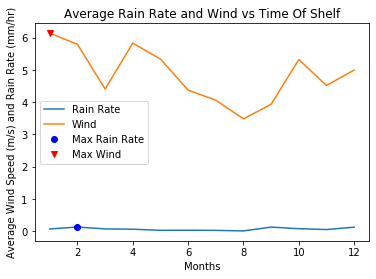

In [0]:
plt.plot(Months,avg_rain, label='Rain Rate')
plt.plot(Months,avg_wind, label='Wind')
plt.plot(Months[1],rain_max,'bo', label='Max Rain Rate')
plt.plot(Months[0],wind_max,'rv', label='Max Wind')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Average Wind Speed (m/s) and Rain Rate (mm/hr)')
plt.title('Average Rain Rate and Wind vs Time Of Shelf')
print("Max wind is at 1")
print("Max wind equals :", wind_max)
print("Max Rain is at 2")
print("Max Rain equals :", rain_max)
plt.show()

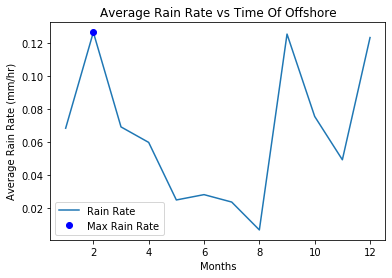

In [0]:
plt.plot(Months,avg_rain, label='Rain Rate')
plt.plot(Months[1],rain_max,'bo', label='Max Rain Rate')
plt.xlabel('Months')
plt.ylabel('Average Rain Rate (mm/hr)')
plt.title('Average Rain Rate vs Time Of Offshore')
plt.legend()

## Oregon Offshore Surface Mooring

In [0]:
wind_1 = []
wind_2 = []
wind_3 = []
wind_4 = []
wind_5 = []
wind_6 = []
wind_7 = []
wind_8 = []
wind_9 = []
wind_10 = []
wind_11 = []
wind_12 = []
rain_1 = []
rain_2 = []
rain_3 = []
rain_4 = []
rain_5 = []
rain_6 = []
rain_7 = []
rain_8 = []
rain_9 = []
rain_10 = []
rain_11 = []
rain_12 = []
Months = [1,2,3,4,5,6,7,8,9,10,11,12]

### Rain and Wind

In [0]:
API_USERNAME = 'OOIAPI-LRAQISAJJCRQUR'
API_TOKEN = 'TEMP-TOKEN-XQS0M8G9IOU6FK'

# Instrument Information
site = 'CE04OSSM'
node = 'SBD11'
instrument = '06-METBKA000'
method = 'telemetered'
stream = 'metbk_hourly'

params = {
  'beginDT':'2019-01-01T00:00:00.000Z',
  'endDT':'2020-01-01T00:00:00.000Z',
  'format':'application/csv',
  'parameter' : '3076,3092,3074',
}

api_base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url ='/'.join((api_base_url,site,node,instrument,method,stream))

r = requests.get(data_request_url, params=params, auth=(API_USERNAME, API_TOKEN))
data1 = r.json()

check_complete = data1['allURLs'][1] + '/status.txt'
print('Initiating request')
for i in range(1000): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('Request complete. Reading data...')
        break
    else:
        time.sleep(.5)

url = data1['allURLs'][0]

c = Crawl(url, select=[".*\.csv$"], debug=False)
urls = [s.get("url") for d in c.datasets for s in d.services if s.get("service").lower() == "httpserver"]

#Requesting an entire year of data will result in multiple CSV files; 
#The following code compiles them into one DataFrame, starting in January and ending in December.
data=pd.DataFrame()  
for x in range(1,len(urls)+1):
  url2=urls[len(urls)-x]
  #print(url)
  newData=pd.read_csv(url2)
  newData=newData.reset_index(drop=True)
  data=pd.concat(objs=[data,newData])


Initiating request
Request complete. Reading data...


In [0]:
data = data.sort_values(by='time',ascending=True).reset_index(drop=True)

In [0]:
rain_raw = data.loc[:, 'met_rainrte']
wind_raw = data.loc[:, 'metbk_a_dcl_instrument-met_relwind_speed']
#wind_nom = preprocessing.scale(wind_raw)
#rain_nom = preprocessing.scale(rain_raw)
time_raw = data.loc[:, 'time']
timeraw_Offshore = time_raw

In [0]:
b = datetime(1900, 1, 1)
c = datetime(1970, 1, 1)
e = timedelta(hours=8)
tdelta = c-b-e
t = pd.to_datetime(time_raw, unit= 's')
timeOffshore = t - tdelta

Orange is Wind Speed
Blue is Rain Rate
Red is No Rain No Wind
Black is Rain Without Wind
Green is Wind Without Rain
Yellow is Both Rain and Wind


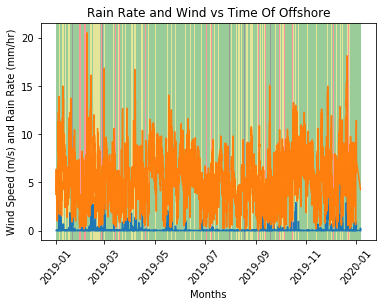

In [0]:

for i in range(len(time_raw)-1):
        if rain_raw[i]/np.mean(rain_raw) < .25 and wind_raw[i]/np.mean(wind_raw) < .25:
            #Case 1: No rain or wind
            plt.axvspan(timeOffshore[i], timeOffshore[i+1], facecolor='r', alpha=.4)
        elif rain_raw[i]/np.mean(rain_raw) >= .25 and wind_raw[i]/np.mean(wind_raw) < .25:
            #Case 2:Rain and no wind
            plt.axvspan(timeOffshore[i], timeOffshore[i+1], facecolor='k', alpha=.4)
        elif rain_raw[i]/np.mean(rain_raw) < .25 and wind_raw[i]/np.mean(wind_raw) >= .25:
            #Case 3:Wind and no rain 
            plt.axvspan(timeOffshore[i], timeOffshore[i+1], facecolor='g', alpha=.4)
        else:
            #Case 4: Rain and Wind
            plt.axvspan(timeOffshore[i], timeOffshore[i+1], facecolor='y', alpha=.4)
plt.plot(timeOffshore,rain_raw)
plt.plot(timeOffshore,wind_raw)
degrees = 50
plt.xticks(rotation=degrees)
plt.xlabel('Months')
plt.ylabel('Wind Speed (m/s) and Rain Rate (mm/hr)')
plt.title('Rain Rate and Wind vs Time Of Offshore')
print("Orange is Wind Speed")
print("Blue is Rain Rate")
print("Red is No Rain No Wind")
print("Black is Rain Without Wind")
print("Green is Wind Without Rain")
print("Yellow is Both Rain and Wind")
plt.show()

In [0]:
rain_Offshore = rain_raw
wind_Offshore = wind_raw
time_Offshore = time_raw

### Average

In [0]:
#Devide Timeline to 12 months
time_interval = round(len(time_raw)/12)
for i in range(len(time_raw)):
  if i <= time_interval:
      rain_1.append(rain_raw[i])
      wind_1.append(wind_raw[i])
  elif i > time_interval and i <= 2*time_interval:
      rain_2.append(rain_raw[i])
      wind_2.append(wind_raw[i])
  elif i > 2*time_interval and i <= 3*time_interval:
      rain_3.append(rain_raw[i])
      wind_3.append(wind_raw[i])
  elif i > 3*time_interval and i <= 4*time_interval:
      rain_4.append(rain_raw[i])
      wind_4.append(wind_raw[i])
  elif i > 4*time_interval and i <= 5*time_interval:
      rain_5.append(rain_raw[i])
      wind_5.append(wind_raw[i])
  elif i > 5*time_interval and i <= 6*time_interval:
      rain_6.append(rain_raw[i])
      wind_6.append(wind_raw[i])
  elif i > 6*time_interval and i <= 7*time_interval:
      rain_7.append(rain_raw[i])
      wind_7.append(wind_raw[i])
  elif i > 7*time_interval and i <= 8*time_interval:
      rain_8.append(rain_raw[i])
      wind_8.append(wind_raw[i])
  elif i > 8*time_interval and i <= 9*time_interval:
      rain_9.append(rain_raw[i])
      wind_9.append(wind_raw[i])
  elif i > 9*time_interval and i <= 10*time_interval:
      rain_10.append(rain_raw[i])
      wind_10.append(wind_raw[i])
  elif i > 10*time_interval and i <= 11*time_interval:
      rain_11.append(rain_raw[i])
      wind_11.append(wind_raw[i])
  elif i > 11*time_interval:
      rain_12.append(rain_raw[i])
      wind_12.append(wind_raw[i])

In [0]:
avg_rain = []
avg_wind = []

avg_rain.append(np.mean(rain_1))
avg_rain.append(np.mean(rain_2))
avg_rain.append(np.mean(rain_3))
avg_rain.append(np.mean(rain_4))
avg_rain.append(np.mean(rain_5))
avg_rain.append(np.mean(rain_6))
avg_rain.append(np.mean(rain_7))
avg_rain.append(np.mean(rain_8))
avg_rain.append(np.mean(rain_9))
avg_rain.append(np.mean(rain_10))
avg_rain.append(np.mean(rain_11))
avg_rain.append(np.mean(rain_12))
avg_wind.append(np.mean(wind_1))
avg_wind.append(np.mean(wind_2))
avg_wind.append(np.mean(wind_3))
avg_wind.append(np.mean(wind_4))
avg_wind.append(np.mean(wind_5))
avg_wind.append(np.mean(wind_6))
avg_wind.append(np.mean(wind_7))
avg_wind.append(np.mean(wind_8))
avg_wind.append(np.mean(wind_9))
avg_wind.append(np.mean(wind_10))
avg_wind.append(np.mean(wind_11))
avg_wind.append(np.mean(wind_12))


In [0]:
rain_max = max(avg_rain)
wind_max = max(avg_wind)

Max wind is at 10
Max wind equals : 6.690443682806965
Max Rain is at 12
Max Rain equals : 0.13332812250784293


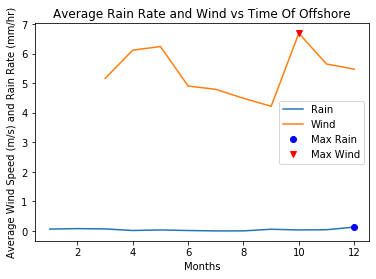

In [0]:
plt.plot(Months,avg_rain, label= 'Rain')
plt.plot(Months,avg_wind, label = 'Wind')
plt.plot(Months[11],rain_max,'bo', label='Max Rain')
plt.plot(Months[9],wind_max,'rv', label='Max Wind')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Average Wind Speed (m/s) and Rain Rate (mm/hr)')
plt.title('Average Rain Rate and Wind vs Time Of Offshore')
print("Max wind is at 10")
print("Max wind equals :", wind_max)
print("Max Rain is at 12")
print("Max Rain equals :", rain_max)
plt.show()

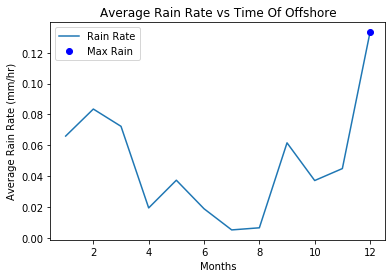

In [0]:
plt.plot(Months,avg_rain, label='Rain Rate')
plt.plot(Months[11],rain_max,'bo', label='Max Rain')
plt.xlabel('Months')
plt.ylabel('Average Rain Rate (mm/hr)')
plt.title('Average Rain Rate vs Time Of Offshore')
plt.legend()

## Correlation


### Rain

In [0]:
blank = np.isnan(rain_Offshore)
rain_Offshore[blank] = 0
blank = np.isnan(rain_Shelf)
rain_Shelf[blank] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


max correlation is at lag -238
max correlation is: 0.217


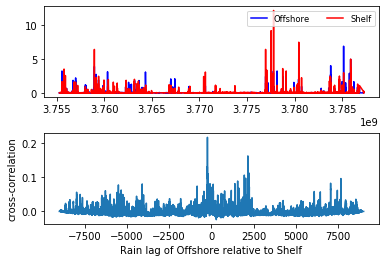

In [0]:
npts = 9000
x = timeraw_Offshore
y1 = rain_Offshore
y2 = rain_Shelf

ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
lags = np.linspace(-npts + 1, npts, len(ccor))

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(timeraw_Offshore, y1, 'b', label='Offshore')
ax.plot(timeraw_Shelf, y2, 'r', label='Shelf')
#ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
#ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('Rain lag of Offshore relative to Shelf')

maxlag = lags[np.argmax(ccor)]
maxcor = round(ccor[np.argmax(ccor)],3)
print("max correlation is at lag %d" % maxlag)
print("max correlation is:", maxcor)

### Wind


In [0]:
blank = np.isnan(wind_Offshore)
wind_Offshore[blank] = 0
blank = np.isnan(wind_Shelf)
wind_Shelf[blank] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


max correlation is at lag -187
max correlation is: 0.269


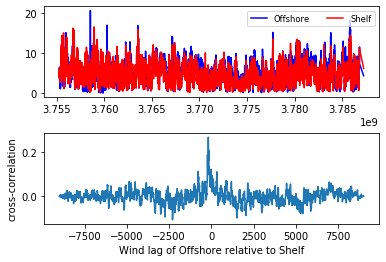

In [0]:
npts = 9000
x = timeraw_Offshore
y1 = wind_Offshore
y2 = wind_Shelf

ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
lags = np.linspace(-npts + 1, npts, len(ccor))

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(timeraw_Offshore, y1, 'b', label='Offshore')
ax.plot(timeraw_Shelf, y2, 'r', label='Shelf')
#ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
#ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('Wind lag of Offshore relative to Shelf')

maxlag = lags[np.argmax(ccor)]
maxcor = round(ccor[np.argmax(ccor)],3)
print("max correlation is at lag %d" % maxlag)
print("max correlation is:", maxcor)